#  The dataset is located at openneuro.org and its OpenNeuro Accession Number: ds003685 Files: 5398 Size: 30.52GB

## Comparing power spectra of EEG from two subjects 
    A well known method in EEG analysis is to decompose raw EEG traces into power spectra using fast Fourier transforms. This splits the raw data into frequencies contained in the data and the power (strength of signal) at each frequency. EEG wave frequencies (e.g. delta (> 8 Hz), theta (~ 8Hz) , alpha (9-14 Hz), beta (> 14 Hz), gamma etc are associated with known brain functions. For example, slow delta frequencies are associated with sleep, theta frequencies are associated with memory formation, delta and higher waves are associated with active behavior

## ds03685 dataset

In [89]:
import os
import os.path as op
import openneuro
import matplotlib.pyplot as plt
import mne
from mne.datasets import sample
from mne_bids import BIDSPath, read_raw_bids, print_dir_tree, make_report
import pandas as pd
from tqdm import tqdm

In [120]:
# .. note: If the keyword argument include is left out of
#          ``openneuro.download``, the whole dataset will be downloaded.
#          We're just using data from one subject to reduce the time
#          it takes to run the example.

dataset = 'ds003685'
subject = '10' # subject 01 data was downloaded earlier
bids_root = op.join(op.dirname(sample.data_path()), dataset)
if not op.isdir(bids_root):
    os.makedirs(bids_root)

In [121]:
print(bids_root)

/Users/asgnxt/mne-miniconda/mne_data/ds003685


In [6]:
# Download one subject's data from each dataset
openneuro.download(dataset=dataset, target_dir=bids_root,
                   include=[f'sub-{subject}'])


👋 Hello! This is openneuro-py 2022.1.0. Great to see you! 🤗

   👉 Please report problems 🤯 and bugs 🪲 at
      https://github.com/hoechenberger/openneuro-py/issues

🌍 Preparing to download ds003685 …
👉 Retrieving up to 94 files (5 concurrent downloads).
✅ Finished downloading ds003685.

🧠 Please enjoy your brains.



README:   0%|          | 0.00/891 [00:00<?, ?B/s]

dataset_description.json: 0.00B [00:00, ?B/s]

participants.tsv: 0.00B [00:00, ?B/s]

CHANGES: 0.00B [00:00, ?B/s]

sub-01_ses-session1_task-eyesclosed_run-1_channels.tsv: 0.00B [00:00, ?B/s]

sub-01_ses-session1_task-mathematic_run-3_events.tsv:   0%|          | 0.00/6.05k [00:00<?, ?B/s]

sub-01_ses-session1_task-mathematic_run-3_channels.tsv: 0.00B [00:00, ?B/s]

sub-01_ses-session1_task-mathematic_run-3_eeg.json: 0.00B [00:00, ?B/s]

sub-01_ses-session1_task-memory_run-4_eeg.json: 0.00B [00:00, ?B/s]

sub-01_ses-session1_task-memory_run-4_channels.tsv: 0.00B [00:00, ?B/s]

sub-01_ses-session2_task-eyesclosed_run-1_eeg.json: 0.00B [00:00, ?B/s]

sub-01_ses-session2_task-eyesclosed_run-1_events.tsv: 0.00B [00:00, ?B/s]

sub-01_ses-session2_task-eyesopen_run-2_events.tsv: 0.00B [00:00, ?B/s]

sub-01_ses-session2_task-eyesopen_run-2_channels.tsv: 0.00B [00:00, ?B/s]

sub-01_ses-session2_task-eyesopen_run-2_eeg.json: 0.00B [00:00, ?B/s]

sub-01_ses-session2_task-memory_run-4_events.tsv: 0.00B [00:00, ?B/s]

sub-01_ses-session2_task-music_run-5_eeg.json: 0.00B [00:00, ?B/s]

sub-01_ses-session2_task-music_run-5_channels.tsv: 0.00B [00:00, ?B/s]

sub-01_ses-session2_task-music_run-5_events.tsv: 0.00B [00:00, ?B/s]

sub-01_ses-session3_task-eyesclosed_run-1_channels.tsv: 0.00B [00:00, ?B/s]

sub-01_ses-session3_task-mathematic_run-3_channels.tsv: 0.00B [00:00, ?B/s]

sub-01_ses-session3_task-memory_run-4_channels.tsv: 0.00B [00:00, ?B/s]

sub-01_ses-session3_task-mathematic_run-3_events.tsv: 0.00B [00:00, ?B/s]

sub-01_ses-session3_task-memory_run-4_eeg.json: 0.00B [00:00, ?B/s]

sub-01_ses-session3_task-mathematic_run-3_eeg.json: 0.00B [00:00, ?B/s]

sub-01_ses-session1_task-eyesclosed_run-1_eeg.vhdr: 0.00B [00:00, ?B/s]

sub-01_ses-session1_task-eyesopen_run-2_eeg.vhdr: 0.00B [00:00, ?B/s]

sub-01_ses-session1_task-eyesclosed_run-1_eeg.vmrk: 0.00B [00:00, ?B/s]

sub-01_ses-session1_task-eyesopen_run-2_eeg.vmrk: 0.00B [00:00, ?B/s]

sub-01_ses-session1_task-eyesopen_run-2_eeg.eeg: 0.00B [00:00, ?B/s]

sub-01_ses-session1_task-music_run-5_eeg.vhdr: 0.00B [00:00, ?B/s]

sub-01_ses-session1_task-memory_run-4_eeg.vhdr: 0.00B [00:00, ?B/s]

sub-01_ses-session1_task-memory_run-4_eeg.vmrk: 0.00B [00:00, ?B/s]

sub-01_ses-session1_task-music_run-5_eeg.eeg: 0.00B [00:00, ?B/s]

sub-01_ses-session2_task-eyesopen_run-2_eeg.vhdr: 0.00B [00:00, ?B/s]

sub-01_ses-session2_task-eyesopen_run-2_eeg.vmrk: 0.00B [00:00, ?B/s]

sub-01_ses-session2_task-memory_run-4_eeg.vhdr: 0.00B [00:00, ?B/s]

sub-01_ses-session2_task-eyesopen_run-2_eeg.eeg: 0.00B [00:00, ?B/s]

sub-01_ses-session2_task-music_run-5_eeg.vhdr: 0.00B [00:00, ?B/s]

sub-01_ses-session2_task-music_run-5_eeg.eeg: 0.00B [00:00, ?B/s]

sub-01_ses-session3_task-eyesclosed_run-1_eeg.vhdr: 0.00B [00:00, ?B/s]

sub-01_ses-session3_task-eyesopen_run-2_eeg.eeg: 0.00B [00:00, ?B/s]

sub-01_ses-session3_task-eyesopen_run-2_eeg.vmrk: 0.00B [00:00, ?B/s]

sub-01_ses-session3_task-mathematic_run-3_eeg.vhdr: 0.00B [00:00, ?B/s]

sub-01_ses-session3_task-memory_run-4_eeg.eeg: 0.00B [00:00, ?B/s]

sub-01_ses-session3_task-memory_run-4_eeg.vmrk: 0.00B [00:00, ?B/s]

sub-01_ses-session3_task-music_run-5_eeg.vhdr: 0.00B [00:00, ?B/s]

sub-01_ses-session1_task-eyesclosed_run-1_eeg.json: 0.00B [00:00, ?B/s]

sub-01_ses-session1_task-eyesopen_run-2_channels.tsv: 0.00B [00:00, ?B/s]

sub-01_ses-session1_task-eyesopen_run-2_events.tsv:   0%|          | 0.00/6.05k [00:00<?, ?B/s]

sub-01_ses-session1_task-music_run-5_channels.tsv: 0.00B [00:00, ?B/s]

sub-01_ses-session1_task-music_run-5_events.tsv:   0%|          | 0.00/6.05k [00:00<?, ?B/s]

sub-01_ses-session2_task-eyesclosed_run-1_channels.tsv: 0.00B [00:00, ?B/s]

sub-01_ses-session2_task-mathematic_run-3_eeg.json: 0.00B [00:00, ?B/s]

sub-01_ses-session2_task-memory_run-4_channels.tsv: 0.00B [00:00, ?B/s]

sub-01_ses-session3_task-eyesclosed_run-1_eeg.json: 0.00B [00:00, ?B/s]

sub-01_ses-session3_task-eyesopen_run-2_channels.tsv: 0.00B [00:00, ?B/s]

sub-01_ses-session3_task-memory_run-4_events.tsv: 0.00B [00:00, ?B/s]

sub-01_ses-session3_task-eyesopen_run-2_events.tsv: 0.00B [00:00, ?B/s]

sub-01_ses-session3_task-music_run-5_eeg.json: 0.00B [00:00, ?B/s]

sub-01_ses-session1_task-mathematic_run-3_eeg.vmrk: 0.00B [00:00, ?B/s]

sub-01_ses-session1_task-mathematic_run-3_eeg.eeg: 0.00B [00:00, ?B/s]

sub-01_ses-session1_task-memory_run-4_eeg.eeg: 0.00B [00:00, ?B/s]

sub-01_ses-session2_task-eyesclosed_run-1_eeg.vmrk: 0.00B [00:00, ?B/s]

sub-01_ses-session2_task-eyesclosed_run-1_eeg.eeg: 0.00B [00:00, ?B/s]

sub-01_ses-session2_task-mathematic_run-3_eeg.vmrk: 0.00B [00:00, ?B/s]

sub-01_ses-session2_task-music_run-5_eeg.vmrk: 0.00B [00:00, ?B/s]

sub-01_ses-session3_task-eyesclosed_run-1_eeg.vmrk: 0.00B [00:00, ?B/s]

sub-01_ses-session3_task-mathematic_run-3_eeg.eeg: 0.00B [00:00, ?B/s]

sub-01_ses-session3_task-memory_run-4_eeg.vhdr: 0.00B [00:00, ?B/s]

sub-01_ses-session3_task-music_run-5_eeg.vmrk: 0.00B [00:00, ?B/s]

sub-01_ses-session1_task-eyesopen_run-2_eeg.json: 0.00B [00:00, ?B/s]

sub-01_ses-session1_task-music_run-5_eeg.json: 0.00B [00:00, ?B/s]

sub-01_ses-session2_task-mathematic_run-3_events.tsv: 0.00B [00:00, ?B/s]

sub-01_ses-session3_task-eyesclosed_run-1_events.tsv: 0.00B [00:00, ?B/s]

sub-01_ses-session3_task-eyesopen_run-2_eeg.json: 0.00B [00:00, ?B/s]

sub-01_ses-session1_task-mathematic_run-3_eeg.vhdr: 0.00B [00:00, ?B/s]

sub-01_ses-session1_task-music_run-5_eeg.vmrk: 0.00B [00:00, ?B/s]

sub-01_ses-session1_task-eyesclosed_run-1_eeg.eeg: 0.00B [00:00, ?B/s]

sub-01_ses-session2_task-memory_run-4_eeg.eeg: 0.00B [00:00, ?B/s]

sub-01_ses-session2_task-mathematic_run-3_eeg.eeg: 0.00B [00:00, ?B/s]

sub-01_ses-session3_task-eyesclosed_run-1_eeg.eeg: 0.00B [00:00, ?B/s]

sub-01_ses-session1_task-eyesclosed_run-1_events.tsv:   0%|          | 0.00/6.05k [00:00<?, ?B/s]

sub-01_ses-session2_task-mathematic_run-3_channels.tsv: 0.00B [00:00, ?B/s]

sub-01_ses-session3_task-music_run-5_channels.tsv: 0.00B [00:00, ?B/s]

sub-01_ses-session2_task-eyesclosed_run-1_eeg.vhdr: 0.00B [00:00, ?B/s]

sub-01_ses-session2_task-memory_run-4_eeg.vmrk: 0.00B [00:00, ?B/s]

sub-01_ses-session3_task-mathematic_run-3_eeg.vmrk: 0.00B [00:00, ?B/s]

sub-01_ses-session1_task-memory_run-4_events.tsv:   0%|          | 0.00/6.05k [00:00<?, ?B/s]

sub-01_ses-session2_task-memory_run-4_eeg.json: 0.00B [00:00, ?B/s]

sub-01_ses-session3_task-eyesopen_run-2_eeg.vhdr: 0.00B [00:00, ?B/s]

sub-01_ses-session3_task-music_run-5_events.tsv: 0.00B [00:00, ?B/s]

sub-01_ses-session2_task-mathematic_run-3_eeg.vhdr: 0.00B [00:00, ?B/s]

sub-01_ses-session3_task-music_run-5_eeg.eeg: 0.00B [00:00, ?B/s]

In [92]:
print_dir_tree(bids_root, max_depth=4)

|ds003685/
|--- CHANGES
|--- README
|--- dataset_description.json
|--- participants.tsv
|--- eeg/
|--- sub-01/
|------ ses-session1/
|--------- eeg/
|------------ sub-01_ses-session1_task-eyesclosed_run-1_channels.tsv
|------------ sub-01_ses-session1_task-eyesclosed_run-1_eeg.eeg
|------------ sub-01_ses-session1_task-eyesclosed_run-1_eeg.json
|------------ sub-01_ses-session1_task-eyesclosed_run-1_eeg.vhdr
|------------ sub-01_ses-session1_task-eyesclosed_run-1_eeg.vmrk
|------------ sub-01_ses-session1_task-eyesclosed_run-1_events.tsv
|------------ sub-01_ses-session1_task-eyesopen_run-2_channels.tsv
|------------ sub-01_ses-session1_task-eyesopen_run-2_eeg.eeg
|------------ sub-01_ses-session1_task-eyesopen_run-2_eeg.json
|------------ sub-01_ses-session1_task-eyesopen_run-2_eeg.vhdr
|------------ sub-01_ses-session1_task-eyesopen_run-2_eeg.vmrk
|------------ sub-01_ses-session1_task-eyesopen_run-2_events.tsv
|------------ sub-01_ses-session1_task-mathematic_run-3_channels.tsv
|---

In [94]:
print(bids_root)

/Users/asgnxt/mne-miniconda/mne_data/ds003685


### Read in the raw data
    The naming convention is: e.g. raw5_s1_sub01 : 5 is task 5 (music), s1 stands for session 1 (of 3) and sub01 stands for subject 1. hence the plots below are for music task for subject 1 & 10, memory task for subject 1 & 10 and finally mathematic task for both sujbjects. Should allow for visual inspection of similarites differences in signal frequencies between the two subjects

In [108]:
vhdr_fname = '/Users/asgnxt/mne-miniconda/mne_data/ds003685/sub-01/ses-session1/eeg/sub-01_ses-session1_task-music_run-5_eeg.vhdr'
raw5_s1_sub01 = mne.io.read_raw_brainvision(vhdr_fname, misc='auto', scale=1.0, preload=False, verbose=None)

Extracting parameters from /Users/asgnxt/mne-miniconda/mne_data/ds003685/sub-01/ses-session1/eeg/sub-01_ses-session1_task-music_run-5_eeg.vhdr...
Setting channel info structure...


In [109]:
vhdr_fname = '/Users/asgnxt/mne-miniconda/mne_data/ds003685/sub-10/ses-session1/eeg/sub-10_ses-session1_task-music_run-5_eeg.vhdr'
raw5_s1_sub10 = mne.io.read_raw_brainvision(vhdr_fname, misc='auto', scale=1.0, preload=False, verbose=None)

Extracting parameters from /Users/asgnxt/mne-miniconda/mne_data/ds003685/sub-10/ses-session1/eeg/sub-10_ses-session1_task-music_run-5_eeg.vhdr...
Setting channel info structure...


Effective window size : 4.096 (s)


/var/folders/f6/xkyty3nj32785_c9xjmhv0p80000gn/T/ipykernel_24023/427173150.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw5_s1_sub01.plot_psd(fmax=50)


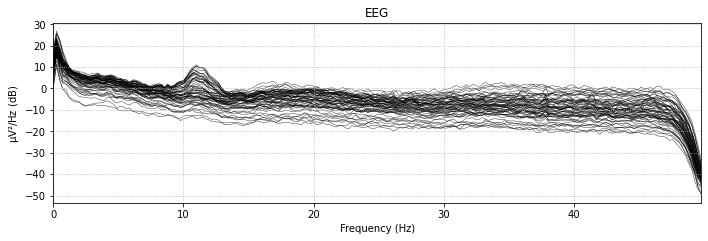

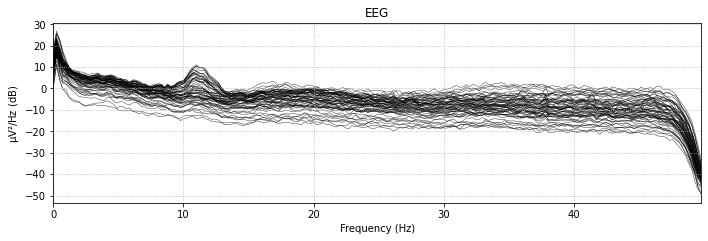

In [110]:
raw5_s1_sub01.plot_psd(fmax=50)

Effective window size : 4.096 (s)


/var/folders/f6/xkyty3nj32785_c9xjmhv0p80000gn/T/ipykernel_24023/1424072347.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw5_s1_sub10.plot_psd(fmax=50)


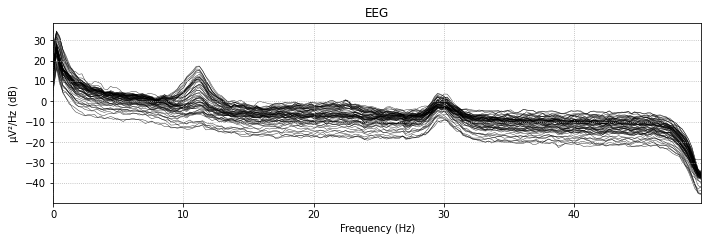

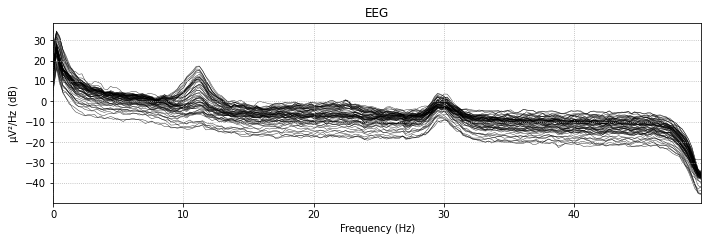

In [111]:
raw5_s1_sub10.plot_psd(fmax=50)

In [103]:
vhdr_fname = '/Users/asgnxt/mne-miniconda/mne_data/ds003685/sub-01/ses-session1/eeg/sub-01_ses-session1_task-memory_run-4_eeg.vhdr'
raw4_s1_sub01 = mne.io.read_raw_brainvision(vhdr_fname, misc='auto', scale=1.0, preload=False, verbose=None)

Extracting parameters from /Users/asgnxt/mne-miniconda/mne_data/ds003685/sub-01/ses-session1/eeg/sub-01_ses-session1_task-memory_run-4_eeg.vhdr...
Setting channel info structure...


In [104]:
vhdr_fname = '/Users/asgnxt/mne-miniconda/mne_data/ds003685/sub-10/ses-session1/eeg/sub-10_ses-session1_task-memory_run-4_eeg.vhdr'
raw4_s1_sub10 = mne.io.read_raw_brainvision(vhdr_fname, misc='auto', scale=1.0, preload=False, verbose=None)

Extracting parameters from /Users/asgnxt/mne-miniconda/mne_data/ds003685/sub-10/ses-session1/eeg/sub-10_ses-session1_task-memory_run-4_eeg.vhdr...
Setting channel info structure...


Effective window size : 4.096 (s)


/var/folders/f6/xkyty3nj32785_c9xjmhv0p80000gn/T/ipykernel_24023/2608749921.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw4_s1_sub01.plot_psd(fmax=50)


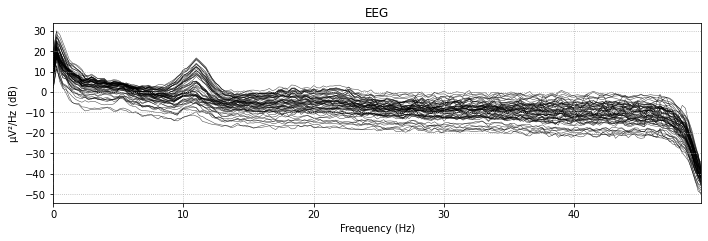

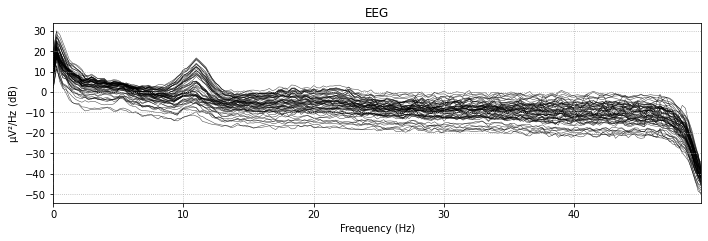

In [112]:
raw4_s1_sub01.plot_psd(fmax=50)

Effective window size : 4.096 (s)


/var/folders/f6/xkyty3nj32785_c9xjmhv0p80000gn/T/ipykernel_24023/1763544545.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw4_s1_sub10.plot_psd(fmax=50)


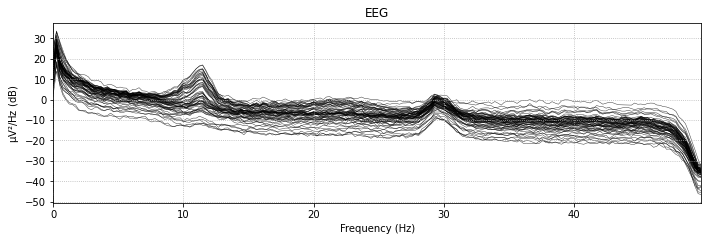

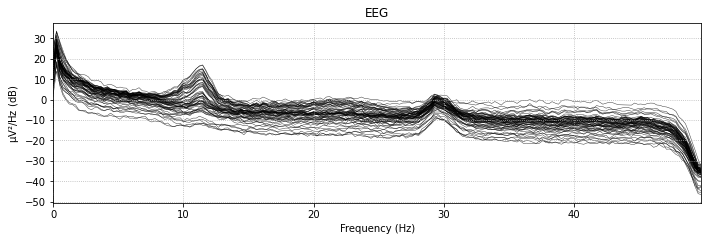

In [113]:
raw4_s1_sub10.plot_psd(fmax=50)

In [114]:
vhdr_fname = '/Users/asgnxt/mne-miniconda/mne_data/ds003685/sub-01/ses-session1/eeg/sub-01_ses-session1_task-mathematic_run-3_eeg.vhdr'
raw3_s1_sub01 = mne.io.read_raw_brainvision(vhdr_fname, misc='auto', scale=1.0, preload=False, verbose=None)

Extracting parameters from /Users/asgnxt/mne-miniconda/mne_data/ds003685/sub-01/ses-session1/eeg/sub-01_ses-session1_task-mathematic_run-3_eeg.vhdr...
Setting channel info structure...


In [115]:
vhdr_fname = '/Users/asgnxt/mne-miniconda/mne_data/ds003685/sub-10/ses-session1/eeg/sub-10_ses-session1_task-mathematic_run-3_eeg.vhdr'
raw3_s1_sub10 = mne.io.read_raw_brainvision(vhdr_fname, misc='auto', scale=1.0, preload=False, verbose=None)

Extracting parameters from /Users/asgnxt/mne-miniconda/mne_data/ds003685/sub-10/ses-session1/eeg/sub-10_ses-session1_task-mathematic_run-3_eeg.vhdr...
Setting channel info structure...


Effective window size : 4.096 (s)


/var/folders/f6/xkyty3nj32785_c9xjmhv0p80000gn/T/ipykernel_24023/2560421904.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw3_s1_sub01.plot_psd(fmax=50)


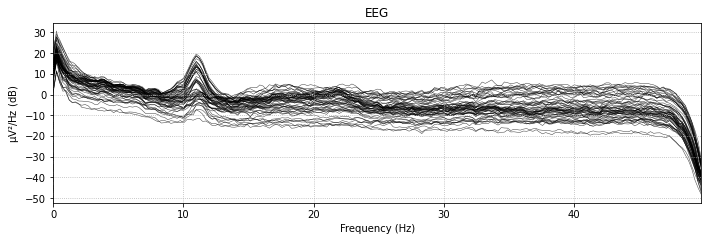

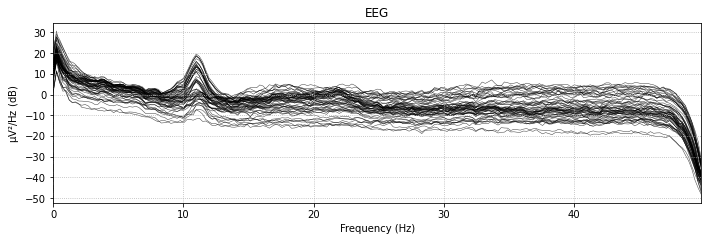

In [116]:
raw3_s1_sub01.plot_psd(fmax=50)

Effective window size : 4.096 (s)


/var/folders/f6/xkyty3nj32785_c9xjmhv0p80000gn/T/ipykernel_24023/2538683280.py:1: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw3_s1_sub10.plot_psd(fmax=50)


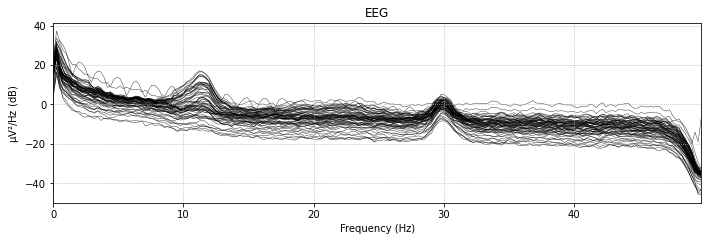

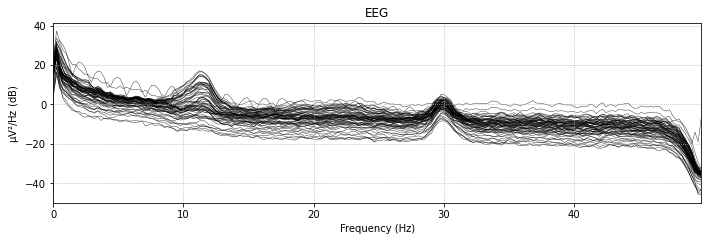

In [117]:
raw3_s1_sub10.plot_psd(fmax=50)

In [118]:
print(raw5_s1_sub01)
print(raw5_s1_sub01.info)

<RawBrainVision | sub-01_ses-session1_task-music_run-5_eeg.eeg, 61 x 150000 (300.0 s), ~65 kB, data not loaded>
<Info | 7 non-empty values
 bads: []
 ch_names: Fp1, AF3, AF7, Fz, F1, F3, F5, F7, FC1, FC3, FC5, FT7, Cz, C1, ...
 chs: 61 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: unspecified
 nchan: 61
 projs: []
 sfreq: 500.0 Hz
>
